In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [55]:
df = pd.read_csv('simulation_results.csv', header=0)

In [56]:
df

,simulation,trial,start_time,end_time,duration,duration_seconds,type,sequence
0,1,0,02:20:17 PM,02:26:15 PM,00:05:58,358,opm,"bowl, breakfast-cereal, cup, spoon, milk"
1,1,1,02:26:17 PM,02:31:24 PM,00:05:07,307,opm,"bowl, breakfast-cereal, cup, spoon, milk"
2,1,2,02:31:26 PM,02:36:32 PM,00:05:06,306,opm,"bowl, breakfast-cereal, cup, spoon, milk"
3,1,3,02:36:36 PM,02:41:44 PM,00:05:08,308,opm,"bowl, breakfast-cereal, cup, spoon, milk"
4,1,4,02:41:47 PM,02:46:15 PM,00:04:28,268,opm,"bowl, breakfast-cereal, cup, spoon, milk"
...,...,...,...,...,...,...,...,...
95,5,5,01:38:15 PM,01:46:01 PM,00:07:46,466,baseline,"breakfast-cereal, cup, bowl, spoon, milk"
96,5,6,01:46:03 PM,01:54:11 PM,00:08:08,488,baseline,"breakfast-cereal, cup, bowl, spoon, milk"
97,5,7,01:54:13 PM,02:01:31 PM,00:07:18,438,baseline,"breakfast-cereal, cup, bowl, spoon, milk"
98,5,8,02:01:33 PM,02:09:04 PM,00:07:31,451,baseline,"breakfast-cereal, cup, bowl, spoon, milk"


In [57]:
custom_cmap2 = ["#46327e", "#277f8e", "#4ac16d"]

In [58]:
df[['duration_seconds', 'type']].groupby(['type']).mean()

,duration_seconds
type,
baseline,379.64
opm,374.72


In [59]:
duration_opm = df.loc[df['type'] == 'opm']['duration_seconds'].mean()

In [60]:
duration_baseline = df.loc[df['type'] == 'baseline']['duration_seconds'].mean()

In [61]:
durations = pd.Series([duration_baseline, duration_opm])

In [62]:
durations.pct_change() * 100

0         NaN
1   -1.295965
dtype: float64

In [91]:
opm = df['duration_seconds'].loc[df['type'] == 'opm'].tolist()
baseline = df['duration_seconds'].loc[df['type'] == 'baseline'].tolist()
len(opm), len(baseline)

(50, 50)

In [93]:
results = pd.DataFrame()

In [101]:
results['opm'] = opm
results['baseline'] = baseline
labels = [col for col in results.columns]

In [114]:
%matplotlib qt

ax = sns.violinplot(data=results,
                    palette='viridis',
                    cut=1,
                    inner='quartiles')

plt.setp(ax.collections, alpha=0.7)

ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=18)

plt.ylabel('duration in seconds', fontsize=18)
#plt.tight_layout(pad=0.9)
plt.show()

In [122]:
simulations_opm = df['simulation'].loc[df['type'] == 'opm'].tolist()
simulations_baseline = df['simulation'].loc[df['type'] == 'baseline'].tolist()

In [124]:
simulations_opm == simulations_baseline

True

In [137]:
results['simulation'] = simulations_baseline

In [138]:
results.groupby('simulation').mean()

,opm,baseline
simulation,,
1,324.6,366.2
2,340.5,340.4
3,343.8,329.2
4,434.0,419.4
5,430.7,443.0


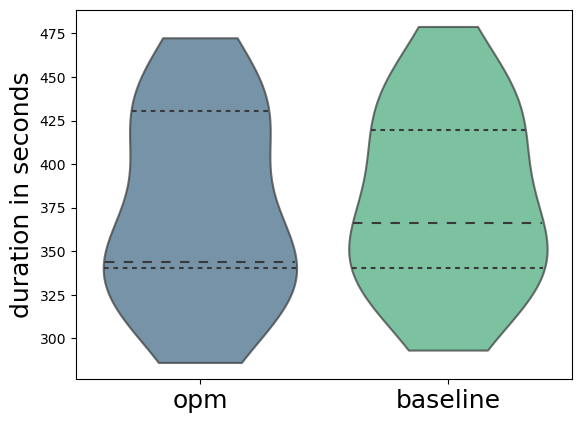

In [142]:
labels = [col for col in results.columns]

%matplotlib inline

ax2 = sns.violinplot(data=results.groupby('simulation').mean(),
                    palette='viridis',
                    cut=1,
                    inner='quartiles')

plt.setp(ax2.collections, alpha=0.7)

ax2.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=18)

plt.ylabel('duration in seconds', fontsize=18)
#plt.tight_layout(pad=0.9)
plt.show()

In [152]:
%matplotlib qt

ax2 = sns.violinplot(x='simulation',
                     y='duration_seconds',
                     hue='type',
                     data=df,
                     palette='viridis',
                     cut=1,
                     inner='quartiles')

plt.setp(ax2.collections, alpha=0.7)

#ax2.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=18)

plt.ylabel('duration in seconds', fontsize=18)
plt.xlabel('simulation', fontsize=18)
plt.legend(loc='upper left', fontsize=18)
#plt.tight_layout(pad=0.9)
plt.show()